# Prophet model from facebook to be used in time series analysis

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("D:\DailyClimateTrain.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
# import the dataset
df = pd.read_csv("D:\DailyClimateTrain.csv", index_col="date", parse_dates=True)
print(df.head())
print(df.info())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None


In [7]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

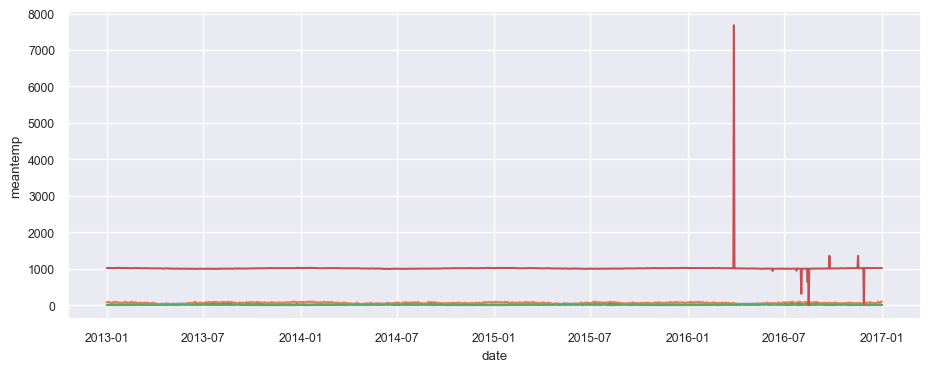

In [8]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df, x="date", y="meantemp")
sns.lineplot(data=df, x="date", y="humidity")
sns.lineplot(data=df, x="date", y="wind_speed")
sns.lineplot(data=df, x="date", y="meanpressure")


In [9]:
# draw same plot on plotly
fig = px.line(df, x=df.index, y="meanpressure", title='Mean Pressure')
fig.show()

In [10]:
# interpolate the outliers from mean pressure column on 28.March.2016
df.loc['2016-03-28', 'meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']



meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [11]:
# make a scatter plot b/w meanteamp and humidity
fig = px.scatter(df, x="meantemp", y="humidity", title='Mean Temperature vs Humidity',
                 trendline="ols", trendline_color_override="red")
fig.show()

In [12]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['meantemp'], df['humidity'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.572


Pearson's correlation is a measure used to analyze the relationship between two variables. The coefficient ranges from -1 to 1. 

- A value close to 1 indicates a strong positive correlation, meaning both variables increase or decrease together.
- A value close to -1 indicates a strong negative correlation, where one variable tends to increase as the other decreases.
- A value close to 0 suggests a weak or no linear correlation, meaning changes in one variable do not reliably predict changes in the other.

<Axes: >

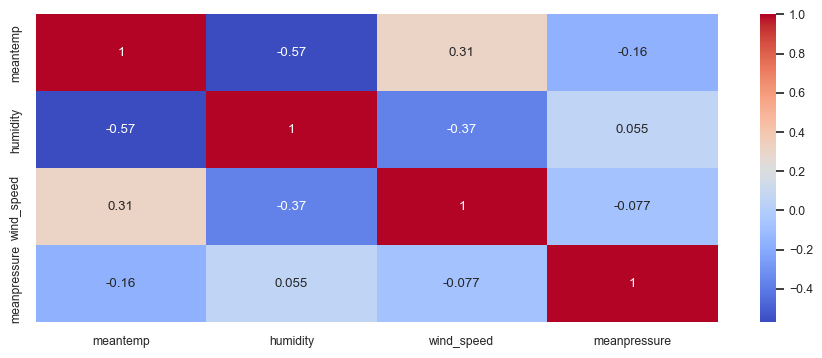

In [13]:
# make a heatmap of correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [14]:
# lets scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-1.927019e-15
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-2.242730e+01
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-1.102679e-01
50%,3.020541e-01,1.105528e-01,-1.273107e-01,4.485792e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,1.861053e-01
max,1.799551e+00,2.340044e+00,7.766988e+00,7.687749e+00


<Axes: >

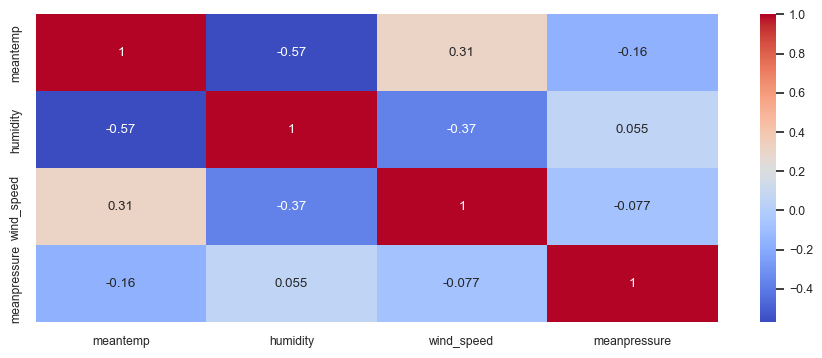

In [15]:
# make a correlation heatmap of scaled data
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm') # we wont see any change in correlation


<Axes: xlabel='date', ylabel='meantemp'>

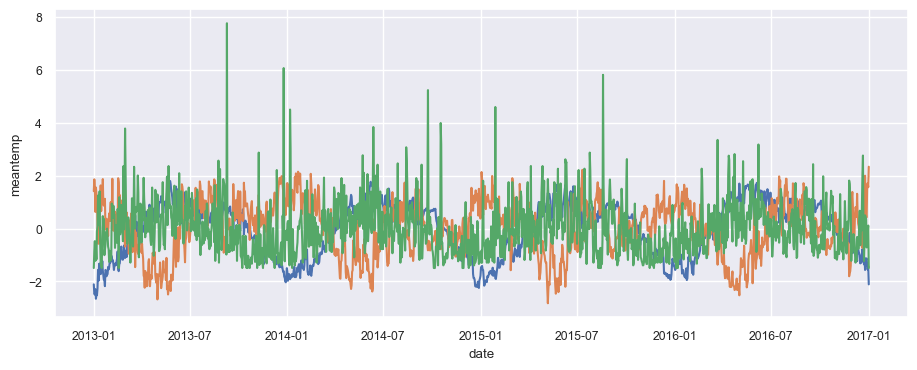

In [16]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df_scaled, x="date", y="meantemp")
sns.lineplot(data=df_scaled, x="date", y="humidity")
sns.lineplot(data=df_scaled, x="date", y="wind_speed")
# sns.lineplot(data=df_scaled, x="date", y="meanpressure")

In [17]:
# add two columns in the dataset for month and year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.202650,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.250041,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.269293,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.235972,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.221162,1,2013


In [18]:
df_scaled.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [19]:
df_scaled.year.unique()

array([2013, 2014, 2015, 2016, 2017])

In [20]:
# add two columns in the dataset for month and year
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


(1.0, 12.0)

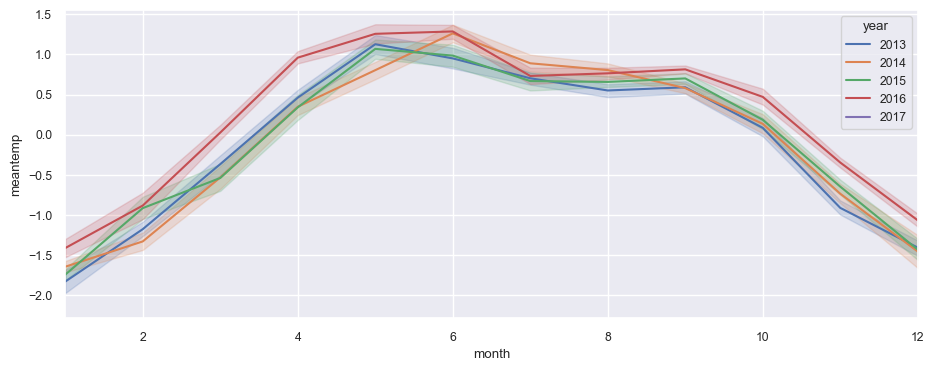

In [21]:
sns.lineplot(data=df_scaled, x="month", y="meantemp", hue="year", palette="deep")
plt.xlim(1, 12)

In [22]:
# same in plotly
fig = px.line(df_scaled, x=df_scaled.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

In [23]:
# same in plotly
fig = px.line(df, x=df.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

# lets use the prophet model from python

In [24]:
df = pd.read_csv("D:\DailyClimateTrain.csv")
df.info()

# rename the columns
df = df.rename(columns={'date':'ds', 'meantemp': 'y'})
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [25]:
print(df)

              ds          y    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]


In [26]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

#call the model
model = Prophet()
model.fit(df)
forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
plot_plotly(model, forecast)

16:22:02 - cmdstanpy - INFO - Chain [1] start processing
16:22:03 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.652715,9.033039,14.373744,24.652715,24.652715,-12.939153,-12.939153,-12.939153,0.034157,0.034157,0.034157,-12.973310,-12.973310,-12.973310,0.0,0.0,0.0,11.713563
1,2013-01-02,24.653036,9.204208,14.428717,24.653036,24.653036,-12.802938,-12.802938,-12.802938,0.146338,0.146338,0.146338,-12.949276,-12.949276,-12.949276,0.0,0.0,0.0,11.850098
2,2013-01-03,24.653357,9.216693,14.411604,24.653357,24.653357,-12.842825,-12.842825,-12.842825,0.067186,0.067186,0.067186,-12.910012,-12.910012,-12.910012,0.0,0.0,0.0,11.810532
3,2013-01-04,24.653679,9.127106,14.571839,24.653679,24.653679,-12.829949,-12.829949,-12.829949,0.027519,0.027519,0.027519,-12.857469,-12.857469,-12.857469,0.0,0.0,0.0,11.823729
4,2013-01-05,24.654000,9.054992,14.430258,24.654000,24.654000,-12.862824,-12.862824,-12.862824,-0.069180,-0.069180,-0.069180,-12.793644,-12.793644,-12.793644,0.0,0.0,0.0,11.791175


In [24]:
# diagnose model fit on the training data
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_true = df['y']
y_pred = forecast['yhat'][:len(df)]
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("MSE: ", mean_squared_error(y_true, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))


MAE:  1.6002890501843976
MSE:  4.130187580644399
RMSE:  2.0322862939665756


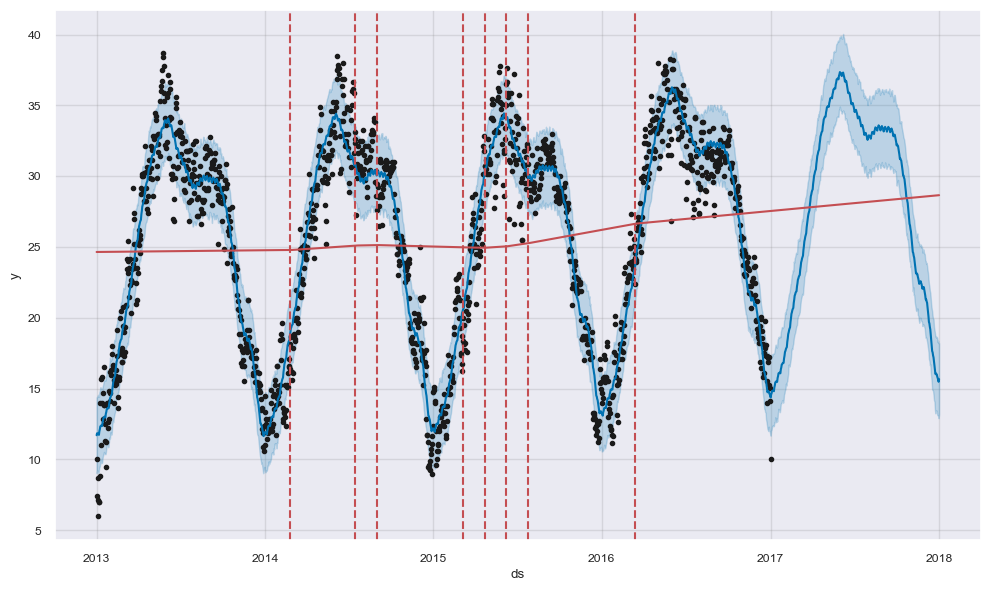

In [25]:
from prophet.plot import add_changepoints_to_plot

# plot model fitness on training data set and validation data set
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


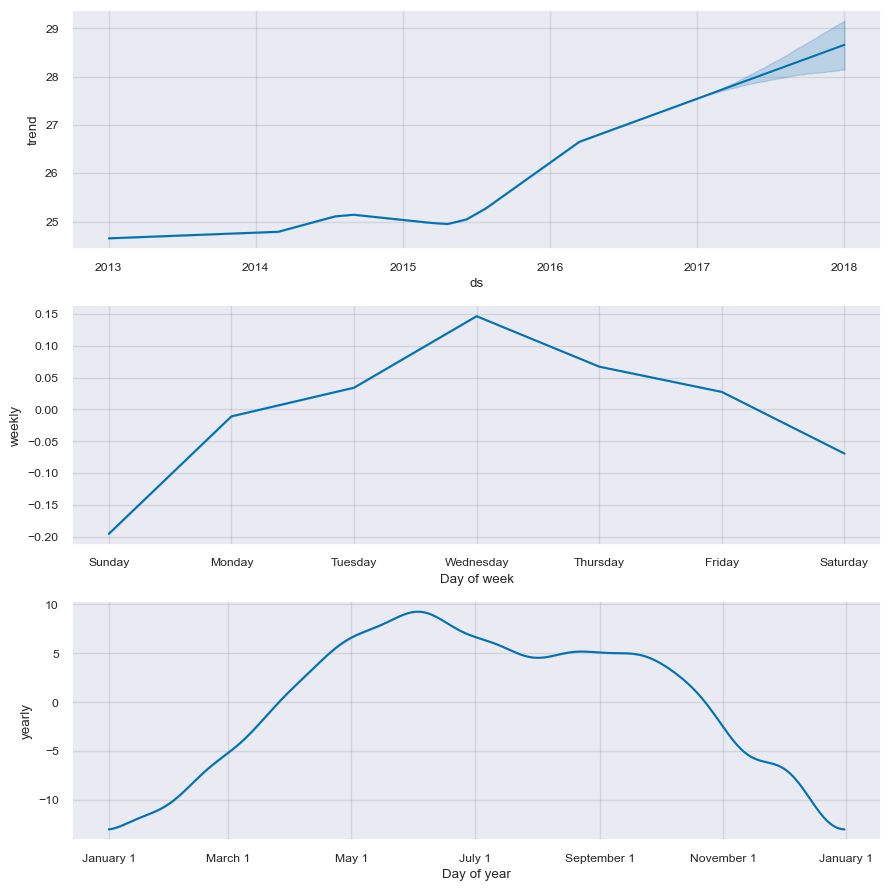

In [26]:
# plot model components
fig = model.plot_components(forecast)

13:30:44 - cmdstanpy - INFO - Chain [1] start processing
13:30:44 - cmdstanpy - INFO - Chain [1] done processing


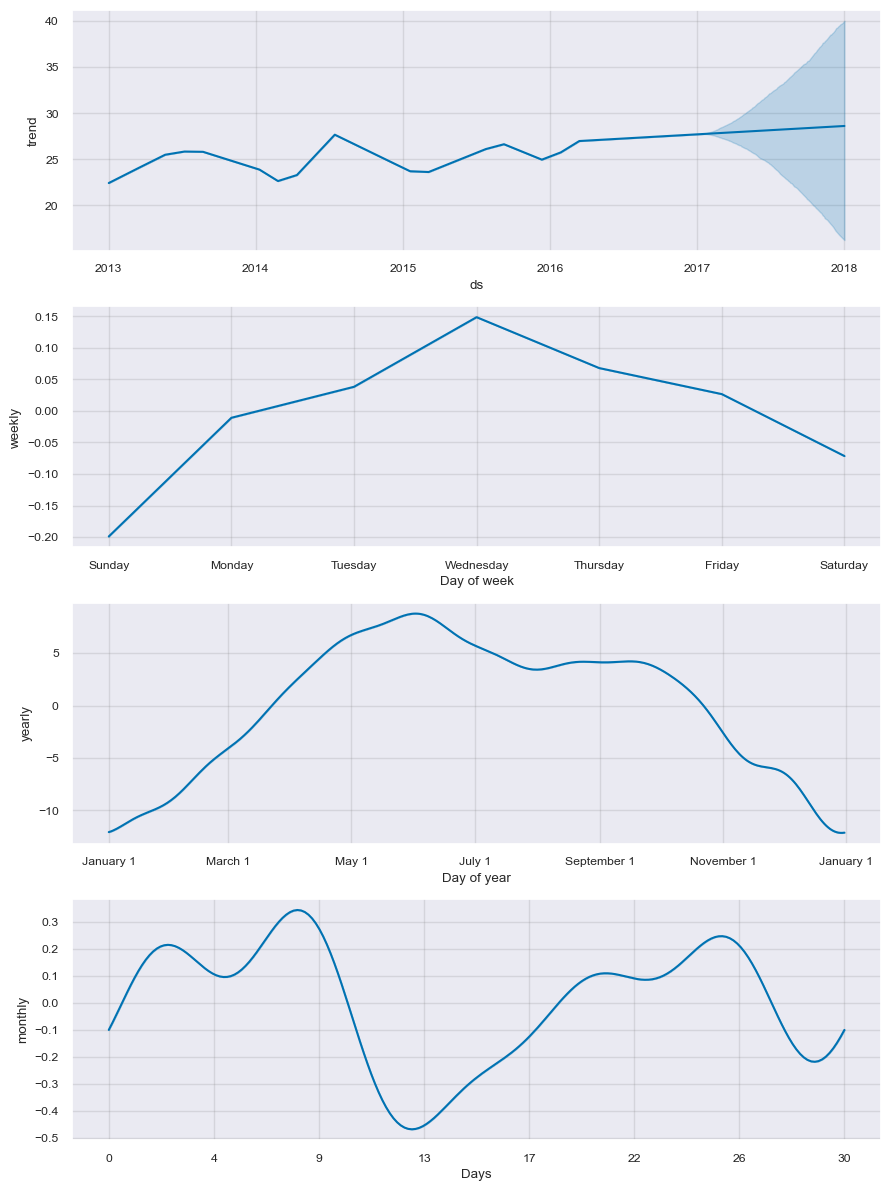

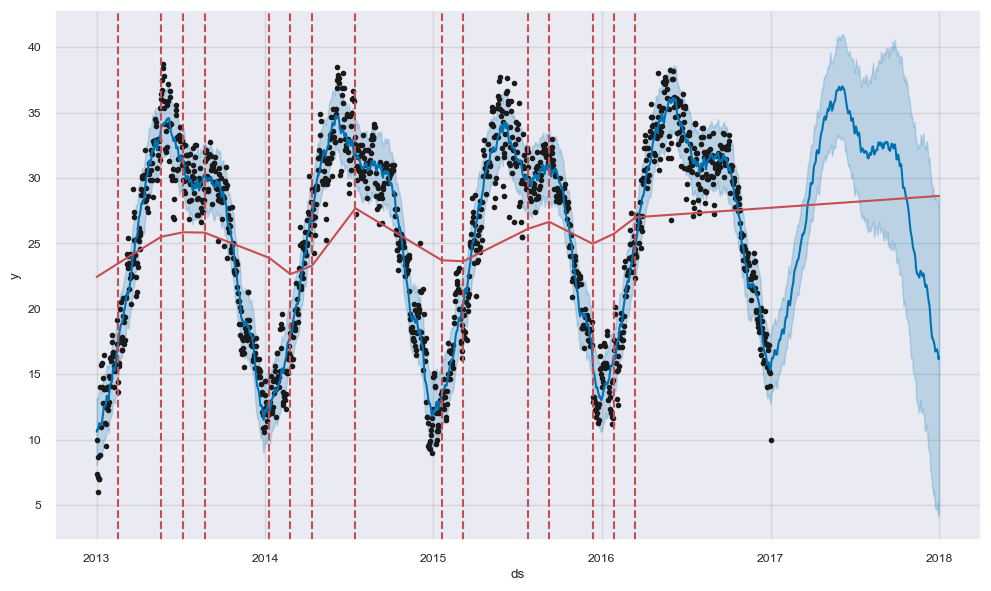

In [31]:
# model more components
model = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.1, holidays_prior_scale=0.1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df)
forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
fig = model.plot_components(forecast)

# plot model fitness on training data set and validation data set
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


# # interpret the output
# from prophet.diagnostics import cross_validation
# df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
# df_cv.head()

# practice more on this